In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

**Medical Imaging Data -> Chest X-Ray**

In [1]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("jtiptj/chest-xray-pneumoniacovid19tuberculosis")

print("Path to dataset files:", path)

100%|██████████| 1.74G/1.74G [00:21<00:00, 87.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis/versions/1


In [2]:

import os

print(os.listdir(path))

['val', 'test', 'train']


In [3]:

train_path = os.path.join(path, "train")
val_path = os.path.join(path, "val")
test_path = os.path.join(path, "test")

print("Train set:", len(os.listdir(train_path)), "images")
print("Validation set:", len(os.listdir(val_path)), "images")
print("Test set:", len(os.listdir(test_path)), "images")

Train set: 4 images
Validation set: 4 images
Test set: 4 images


In [4]:

print("Train classes:", os.listdir(train_path))
print("Validation classes:", os.listdir(val_path))
print("Test classes:", os.listdir(test_path))

Train classes: ['TURBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID19']
Validation classes: ['TURBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID19']
Test classes: ['TURBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID19']


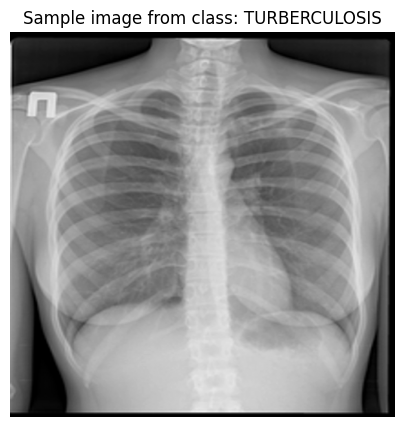

In [5]:

import matplotlib.pyplot as plt
import cv2

sample_class = os.listdir(train_path)[0]
sample_images = os.listdir(os.path.join(train_path, sample_class))

sample_image_path = os.path.join(train_path, sample_class, sample_images[0])
img = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)  # grayscale image

plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title(f"Sample image from class: {sample_class}")
plt.axis('off')
plt.show()

In [6]:

shapes = []
for cls in os.listdir(train_path):
    cls_path = os.path.join(train_path, cls)
    for img_file in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        shapes.append(img.shape)

import numpy as np
shapes = np.array(shapes)

print("Image shape distribution:")
print(np.unique(shapes, axis=0))

Image shape distribution:
[[ 127  384]
 [ 132  446]
 [ 138  400]
 ...
 [3520 4280]
 [4032 3024]
 [4757 5623]]


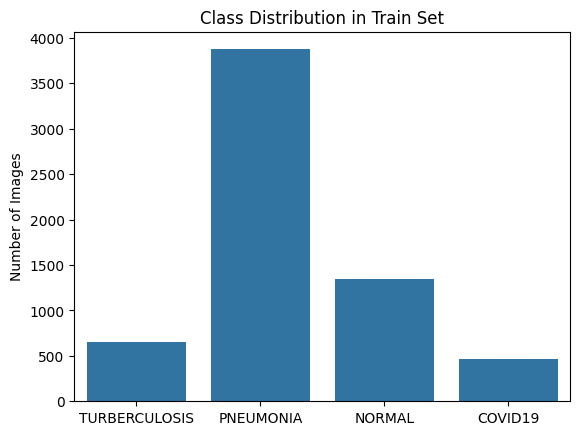

In [7]:

import seaborn as sns

class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in os.listdir(train_path)}

sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution in Train Set")
plt.ylabel("Number of Images")
plt.show()

Categories: ['TURBERCULOSIS', 'PNEUMONIA', 'NORMAL', 'COVID19']


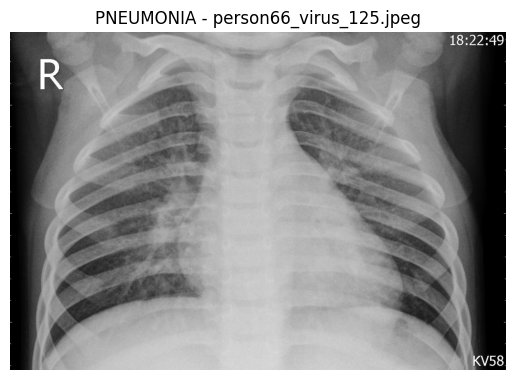

In [8]:

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to dataset train folder
train_path = os.path.join(path, "test")

# List categories
categories = os.listdir(train_path)
print("Categories:", categories)

# Select first category and first image
category = categories[1]
image_file = os.listdir(os.path.join(train_path, category))[0]
image_path = os.path.join(train_path, category, image_file)

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img, cmap='gray')
plt.title(f"{category} - {image_file}")
plt.axis('off')
plt.show()

**Structured Data**

In [9]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare")

print("Path to dataset files:", path)

100%|██████████| 320k/320k [00:00<00:00, 87.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare/versions/1


In [10]:

import os

print(os.listdir(path))

['AI_in_HealthCare_Dataset.csv']


In [11]:

import pandas as pd
import os

csv_path = os.path.join(path, "AI_in_HealthCare_Dataset.csv")
df = pd.read_csv(csv_path)

In [12]:
print(df.head())

   Patient_ID  Age  Gender  Blood_Pressure  Heart_Rate  Temperature  \
0           1   62  Female      102.349134   79.827209    98.912361   
1           2   65    Male      137.760933   72.817449    98.912508   
2           3   82    Male       97.618564   57.135424    99.189728   
3           4   85    Male      121.743752   67.355838    96.033487   
4           5   85    Male      129.530450   64.849416    99.077675   

       Diagnosis    Medication  Treatment_Duration Insurance_Type  \
0   Hypertension       Statins                  24      Uninsured   
1   Hypertension       Insulin                  29      Uninsured   
2      Influenza  Chemotherapy                  15        Private   
3  Heart Disease  Chemotherapy                   5        Private   
4  Heart Disease       Insulin                  10        Private   

   Doctor_Name        Hospital_Name  Lab_Test_Results X-ray_Results  \
0    Dr. Brown  Children's Hospital        114.906151      Abnormal   
1     Dr. Wang  

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Blood_Pressure           5000 non-null   float64
 4   Heart_Rate               5000 non-null   float64
 5   Temperature              5000 non-null   float64
 6   Diagnosis                5000 non-null   object 
 7   Medication               5000 non-null   object 
 8   Treatment_Duration       5000 non-null   int64  
 9   Insurance_Type           5000 non-null   object 
 10  Doctor_Name              5000 non-null   object 
 11  Hospital_Name            5000 non-null   object 
 12  Lab_Test_Results         5000 non-null   float64
 13  X-ray_Results            5000 non-null   object 
 14  Surgery_Type            

In [14]:

print(df.isnull().sum())

Patient_ID                   0
Age                          0
Gender                       0
Blood_Pressure               0
Heart_Rate                   0
Temperature                  0
Diagnosis                    0
Medication                   0
Treatment_Duration           0
Insurance_Type               0
Doctor_Name                  0
Hospital_Name                0
Lab_Test_Results             0
X-ray_Results                0
Surgery_Type                 0
Recovery_Time                0
Allergies                  964
Family_History               0
Patient_Satisfaction         0
AI_Diagnosis_Confidence      0
dtype: int64


In [15]:
print(df.describe())

        Patient_ID          Age  Blood_Pressure   Heart_Rate  Temperature  \
count  5000.000000  5000.000000     5000.000000  5000.000000  5000.000000   
mean   2500.500000    53.433200      119.863621    74.755327    98.603710   
std    1443.520003    20.931669       15.055656     9.974505     1.002509   
min       1.000000    18.000000       61.940115    36.760595    94.930131   
25%    1250.750000    35.000000      109.896065    67.935319    97.929791   
50%    2500.500000    53.000000      119.772157    75.000152    98.618301   
75%    3750.250000    72.000000      129.893989    81.556148    99.265743   
max    5000.000000    89.000000      168.092063   117.198456   102.497318   

       Treatment_Duration  Lab_Test_Results  Recovery_Time  \
count         5000.000000       5000.000000    5000.000000   
mean            14.965400        100.201480       4.944200   
std              8.403495         19.813474       2.570994   
min              1.000000         24.567602       1.000000

In [16]:
print(df.isnull().mean()*100)

Patient_ID                  0.00
Age                         0.00
Gender                      0.00
Blood_Pressure              0.00
Heart_Rate                  0.00
Temperature                 0.00
Diagnosis                   0.00
Medication                  0.00
Treatment_Duration          0.00
Insurance_Type              0.00
Doctor_Name                 0.00
Hospital_Name               0.00
Lab_Test_Results            0.00
X-ray_Results               0.00
Surgery_Type                0.00
Recovery_Time               0.00
Allergies                  19.28
Family_History              0.00
Patient_Satisfaction        0.00
AI_Diagnosis_Confidence     0.00
dtype: float64


In [17]:
df['Insurance_Type'].unique()

array(['Uninsured', 'Private', 'Medicaid', 'Medicare'], dtype=object)

In [18]:
df['X-ray_Results'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [19]:

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

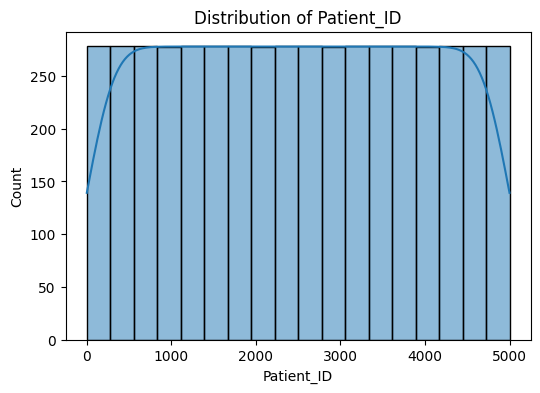

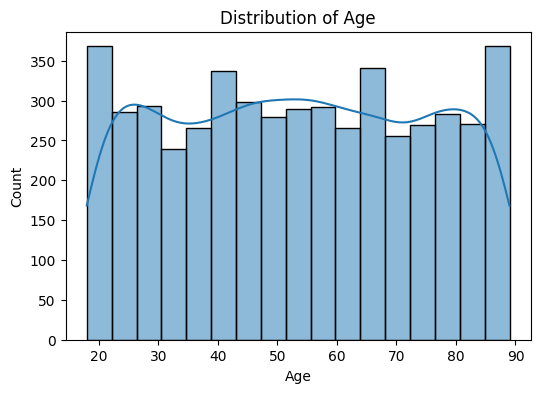

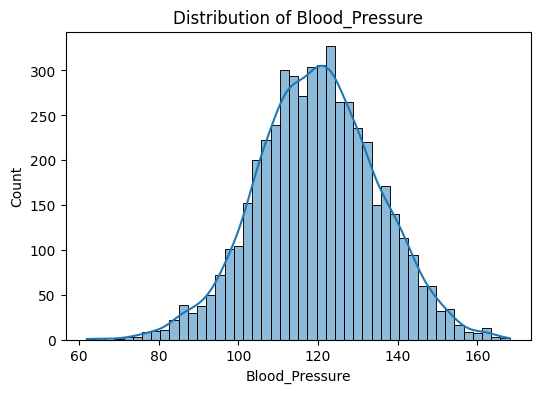

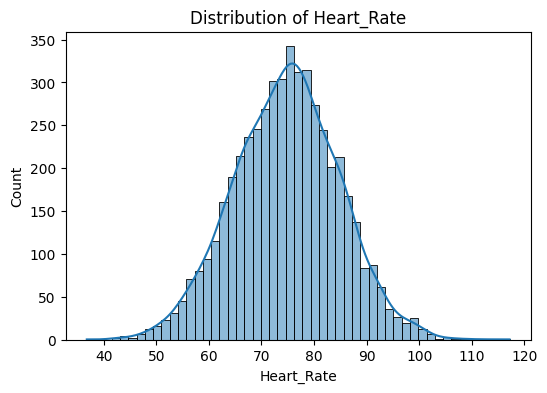

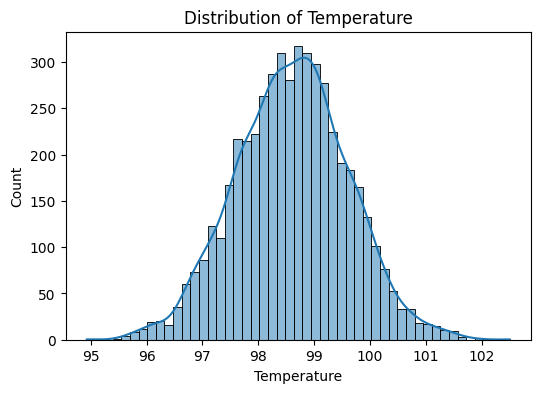

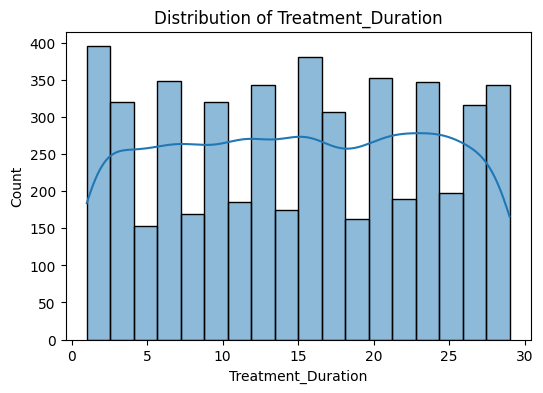

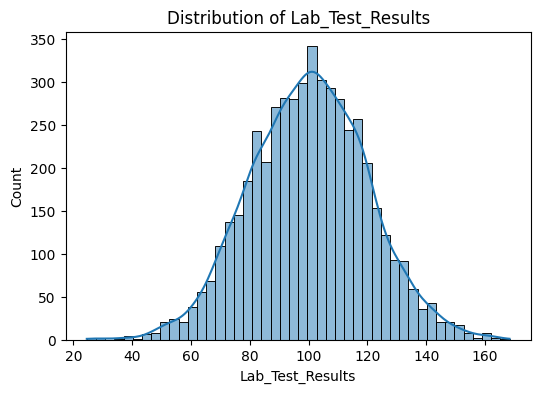

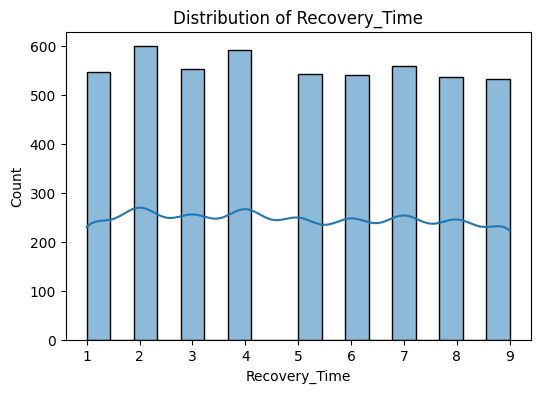

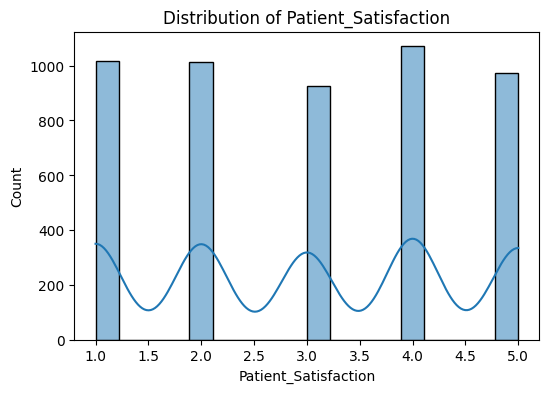

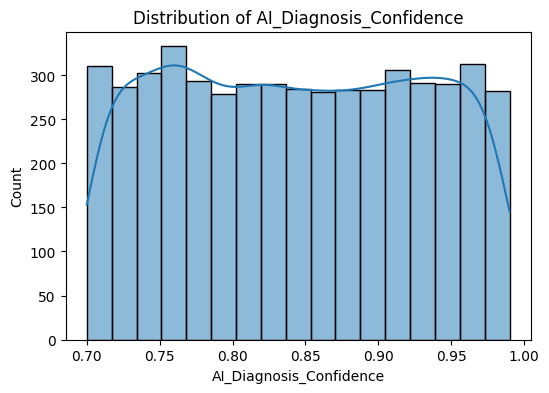

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

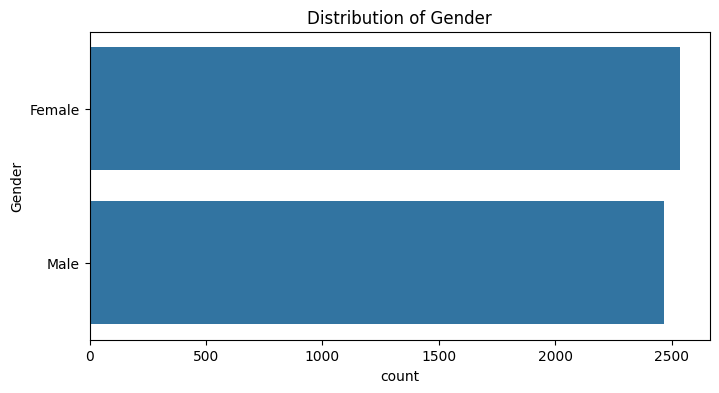

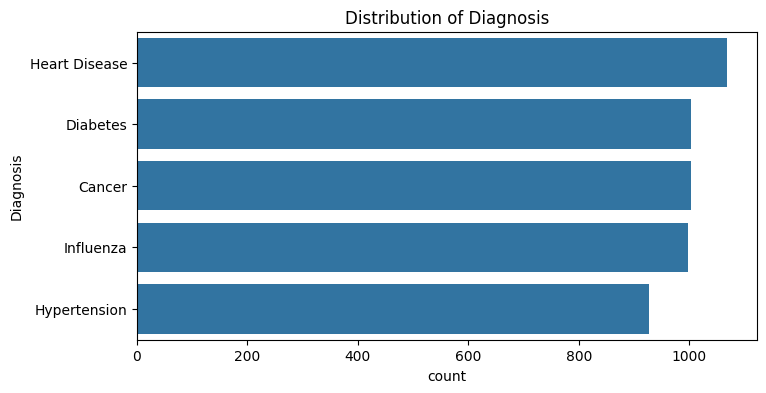

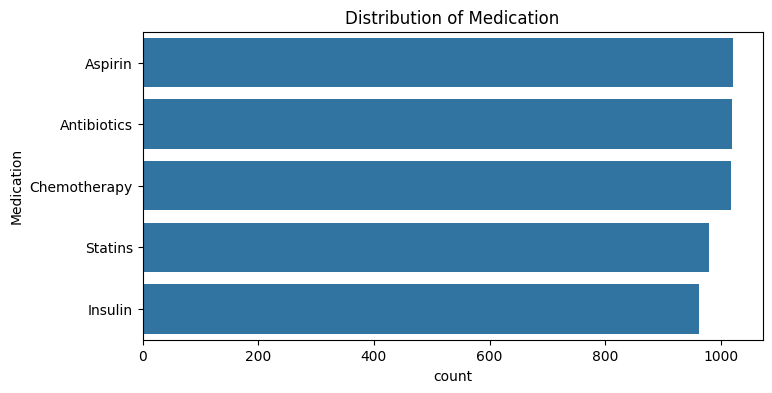

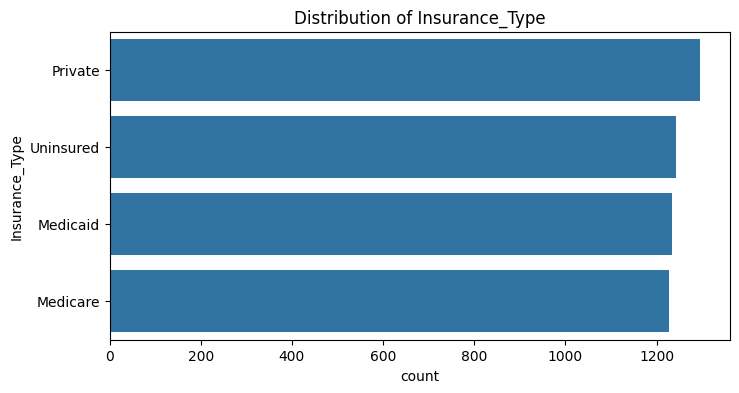

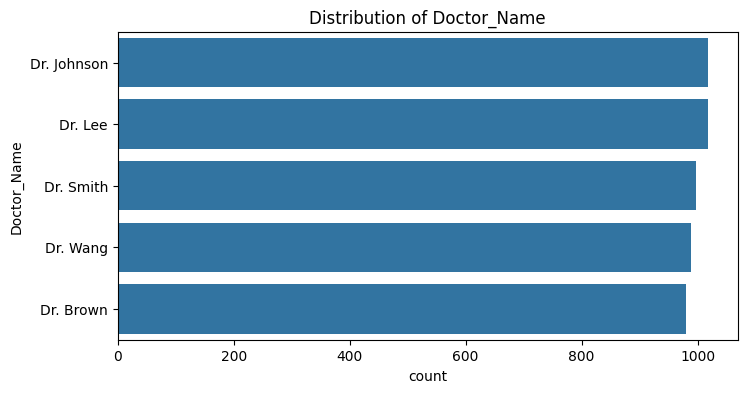

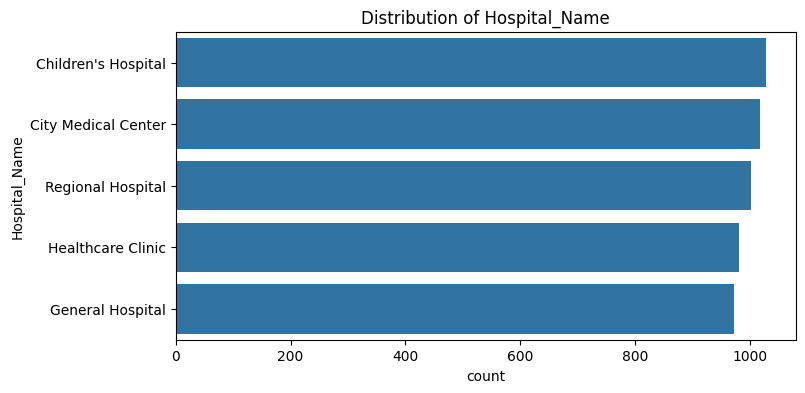

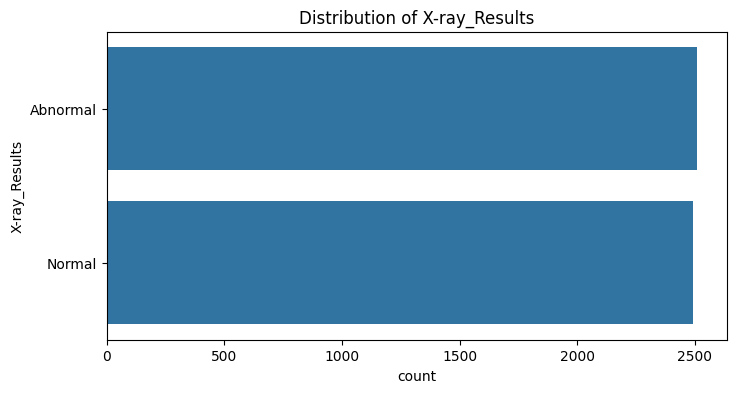

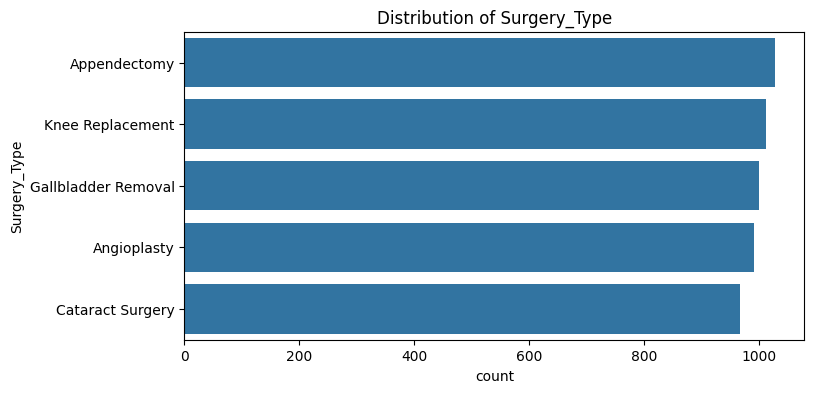

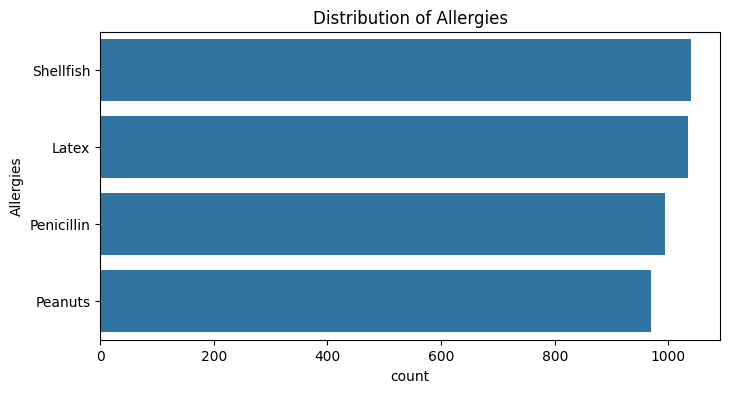

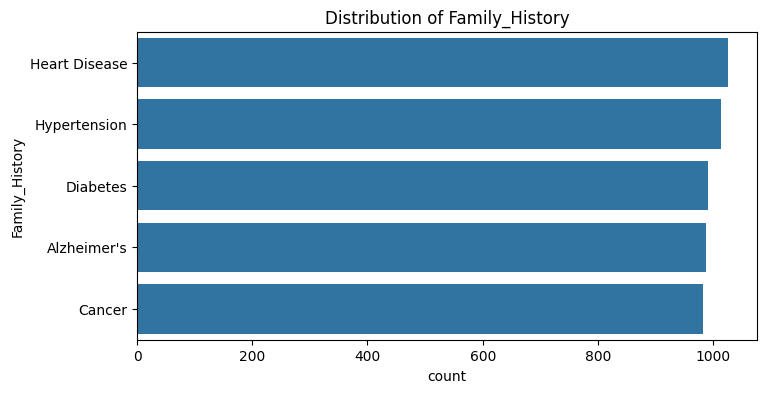

In [21]:

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

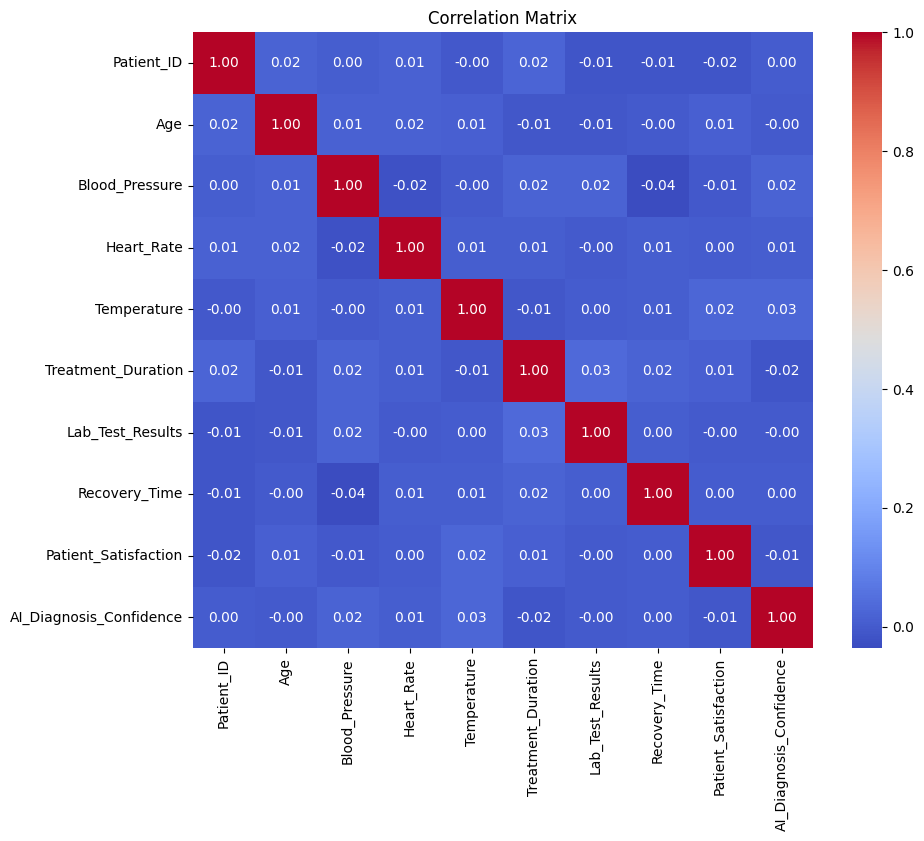

In [22]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

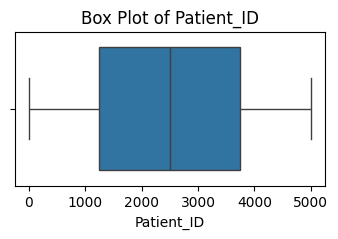

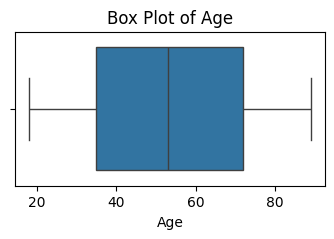

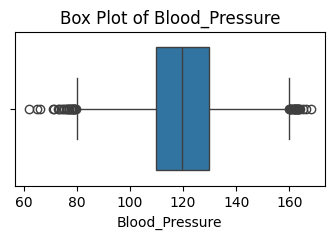

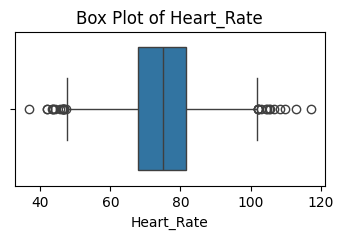

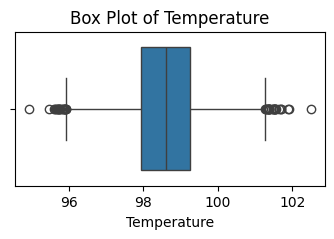

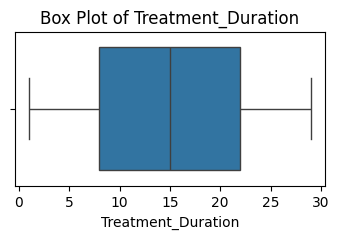

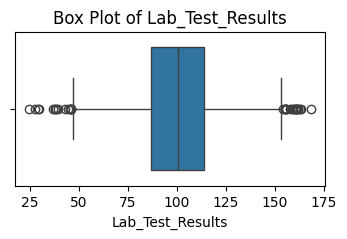

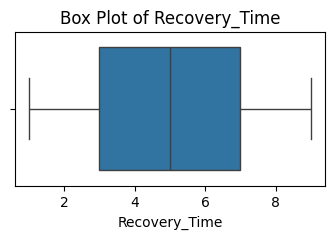

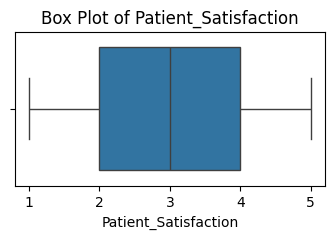

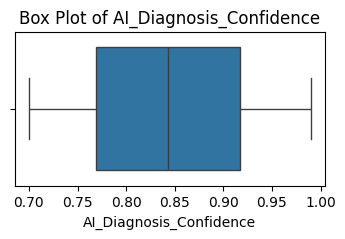

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

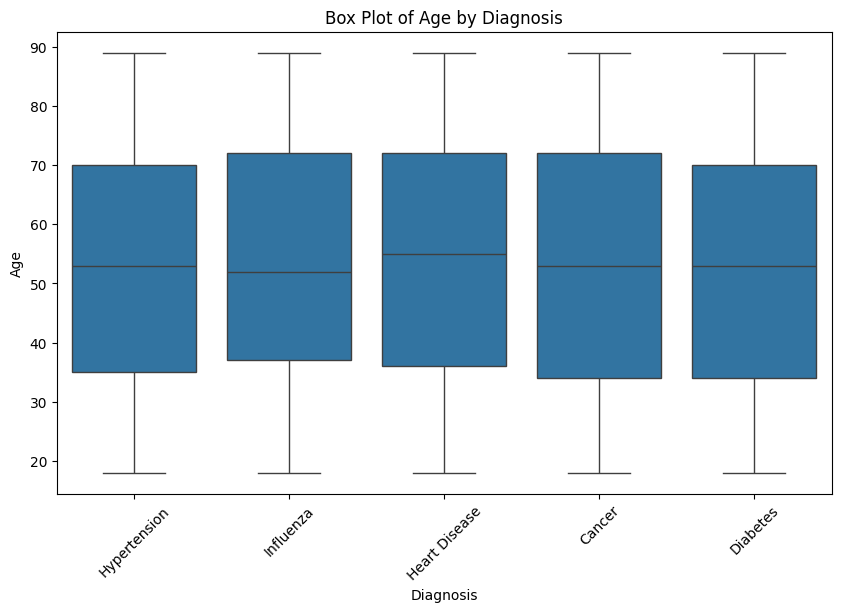

In [24]:

categorical_col = "Diagnosis"  # replace with your column name
numeric_col = "Age"            # replace with your numeric column

plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_col, y=numeric_col, data=df)
plt.title(f"Box Plot of {numeric_col} by {categorical_col}")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


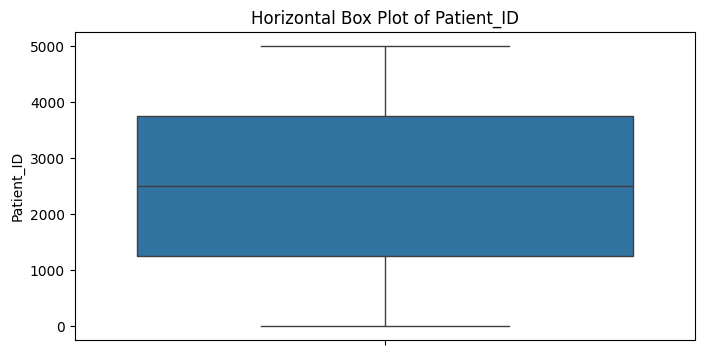

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


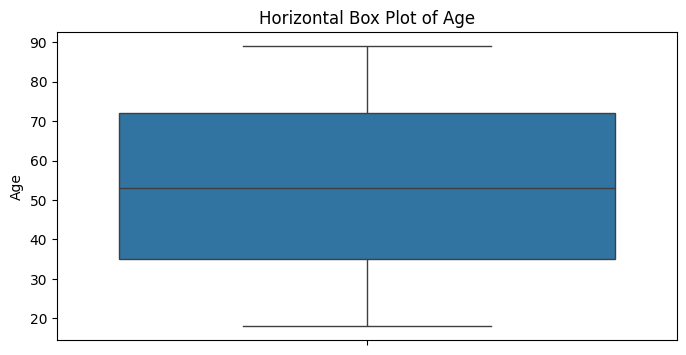

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


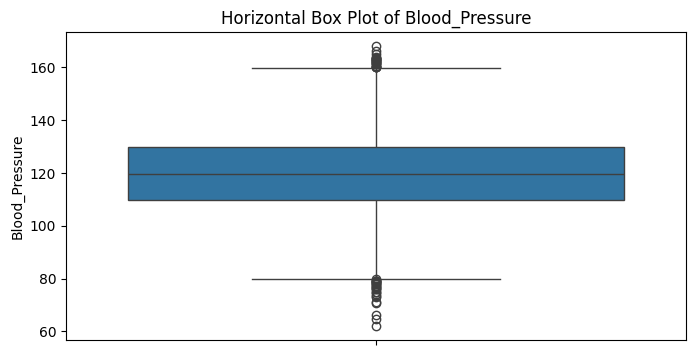

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


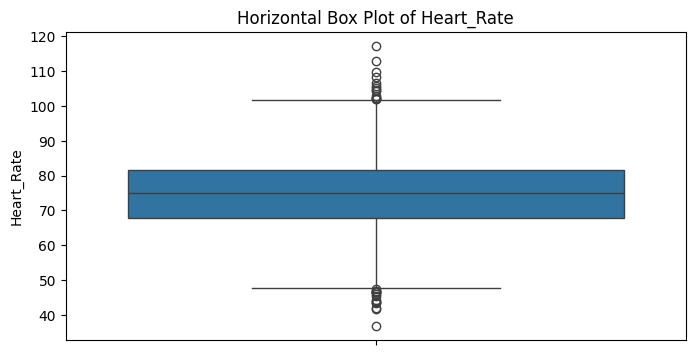

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


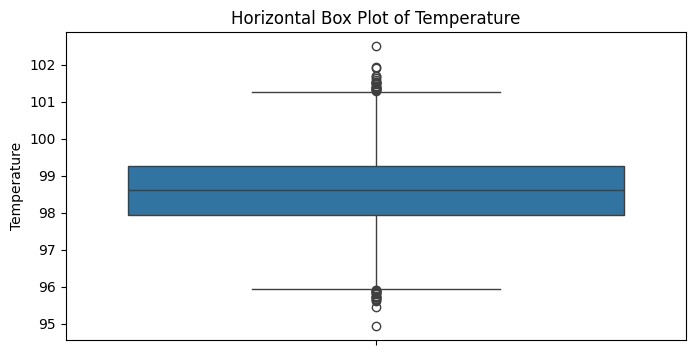

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


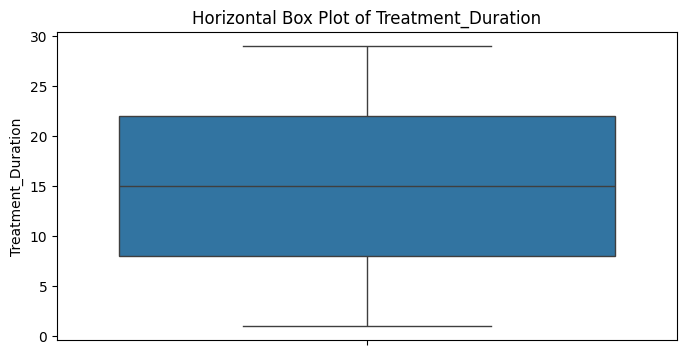

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


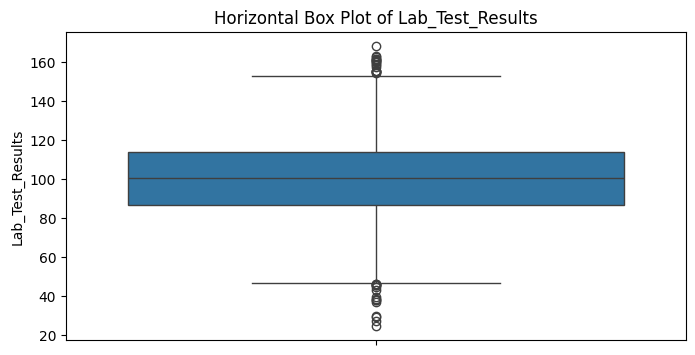

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


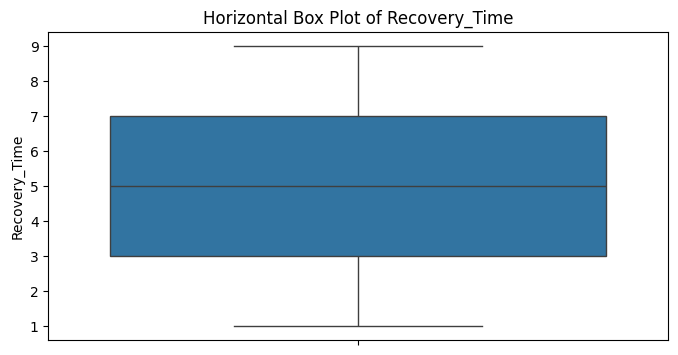

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


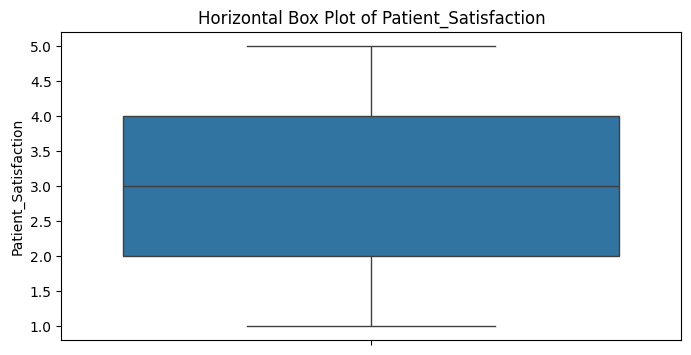

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


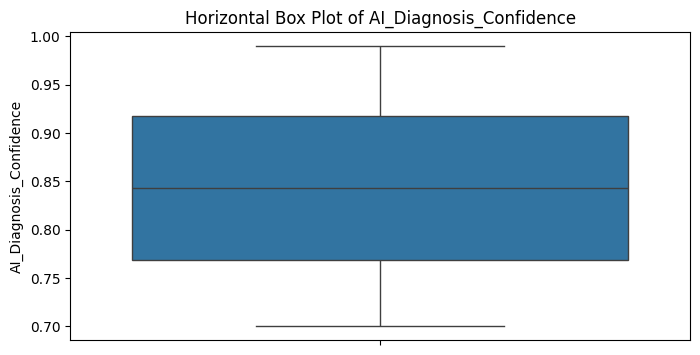

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col], orient="h")  # orient="h" makes it horizontal
    plt.title(f"Horizontal Box Plot of {col}")
    plt.show()

**unstructured**

In [26]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("bpkapkar/health-prescription-data")

print("Path to dataset files:", path)

100%|██████████| 2.78M/2.78M [00:00<00:00, 141MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bpkapkar/health-prescription-data/versions/1


In [27]:

import os

print(os.listdir(path))

['health prescription data.csv']


In [28]:

import pandas as pd
import os

# Path to CSV file
csv_path = os.path.join(path, "health prescription data.csv")

# Load into DataFrame
df = pd.read_csv(csv_path)

# See first few rows
print(df.head())

   SUBJECT_ID  ROW_ID  HADM_ID           CATEGORY ADMISSION_TYPE  \
0       26880     178   135453  Discharge summary      EMERGENCY   
1       42130     181   114236  Discharge summary       ELECTIVE   
2       76874     212   113329  Discharge summary      EMERGENCY   
3       66479     220   134640  Discharge summary      EMERGENCY   
4       31502       8   125483  Discharge summary      EMERGENCY   

                                       DIAGNOSIS  \
0                             S/P FALL;TELEMETRY   
1                   LEFT SPHENOID MENENGIOMA/SDA   
2                         TYLENOL BENZO OVERDOSE   
3                              PEDISTRIAN STRUCK   
4   RESPIRATORY FAILURE;CONGESTIVE HEART FAILURE   

                                                TEXT  
0  Admission Date:  [**2162-3-3**]              D...  
1  Admission Date:  [**2150-2-25**]              ...  
2  Admission Date:  [**2101-10-25**]             ...  
3  Admission Date:  [**2148-2-3**]              D...  
4  

In [29]:
print(df.columns)

Index(['SUBJECT_ID', 'ROW_ID', 'HADM_ID', 'CATEGORY', 'ADMISSION_TYPE',
       'DIAGNOSIS', 'TEXT'],
      dtype='object')


In [30]:
print(df["DIAGNOSIS"][4])  # Replace "Prescription" with the actual column name

 RESPIRATORY FAILURE;CONGESTIVE HEART FAILURE


In [31]:

text_col = "ROW_ID"  # Replace with actual text column

# Number of records
print("Total records:", df.shape[0])

# Null values
print("Missing values:", df[text_col].isnull().sum())

# Text length statistics
df["text_length"] = df[text_col].astype(str).apply(len)
print(df["text_length"].describe())

Total records: 744
Missing values: 0
count    744.000000
mean       3.692204
std        0.539820
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: text_length, dtype: float64


In [32]:

print(df.info())       # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SUBJECT_ID      744 non-null    int64 
 1   ROW_ID          744 non-null    int64 
 2   HADM_ID         744 non-null    int64 
 3   CATEGORY        744 non-null    object
 4   ADMISSION_TYPE  744 non-null    object
 5   DIAGNOSIS       744 non-null    object
 6   TEXT            744 non-null    object
 7   text_length     744 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 46.6+ KB
None


In [33]:
print(df.describe())   # Summary for numeric columns

         SUBJECT_ID        ROW_ID        HADM_ID  text_length
count    744.000000    744.000000     744.000000   744.000000
mean   51954.840054   4256.522849  149883.379032     3.692204
std    28671.336717   3150.082819   28612.121020     0.539820
min      273.000000      8.000000  100112.000000     1.000000
25%    27153.500000    964.750000  124761.500000     3.000000
50%    53782.500000   3913.000000  149164.000000     4.000000
75%    77225.750000   6965.250000  174836.750000     4.000000
max    99752.000000  13168.000000  199999.000000     5.000000


In [34]:
print(df.describe(include=['object']))  # Summary for categorical columns

                 CATEGORY ADMISSION_TYPE   DIAGNOSIS  \
count                 744            744         744   
unique                  1              3         434   
top     Discharge summary      EMERGENCY   PNEUMONIA   
freq                  744            632          33   

                                                     TEXT  
count                                                 744  
unique                                                744  
top     Admission Date:  [**2105-12-14**]             ...  
freq                                                    1  


In [35]:

print(df.isnull().sum())
print(df.isnull().mean() * 100)  # % missing values

SUBJECT_ID        0
ROW_ID            0
HADM_ID           0
CATEGORY          0
ADMISSION_TYPE    0
DIAGNOSIS         0
TEXT              0
text_length       0
dtype: int64
SUBJECT_ID        0.0
ROW_ID            0.0
HADM_ID           0.0
CATEGORY          0.0
ADMISSION_TYPE    0.0
DIAGNOSIS         0.0
TEXT              0.0
text_length       0.0
dtype: float64


In [36]:

categorical_cols = ['CATEGORY', 'ADMISSION_TYPE', 'DIAGNOSIS']
for col in categorical_cols:
    print(df[col].value_counts())
    print("\n")

CATEGORY
Discharge summary    744
Name: count, dtype: int64


ADMISSION_TYPE
EMERGENCY    632
ELECTIVE     105
URGENT         7
Name: count, dtype: int64


DIAGNOSIS
PNEUMONIA                                            33
SEPSIS                                               26
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...    20
LOWER GI BLEED                                       17
CONGESTIVE HEART FAILURE                             16
                                                     ..
PARCREATIC TRANSPLANT                                 1
RIGHT PNEUMOTHORAX                                    1
GALLSTONE                                             1
PCOM                                                  1
INTRACRANIAL HEMORRHAGE;BRADYCARDIA                   1
Name: count, Length: 434, dtype: int64




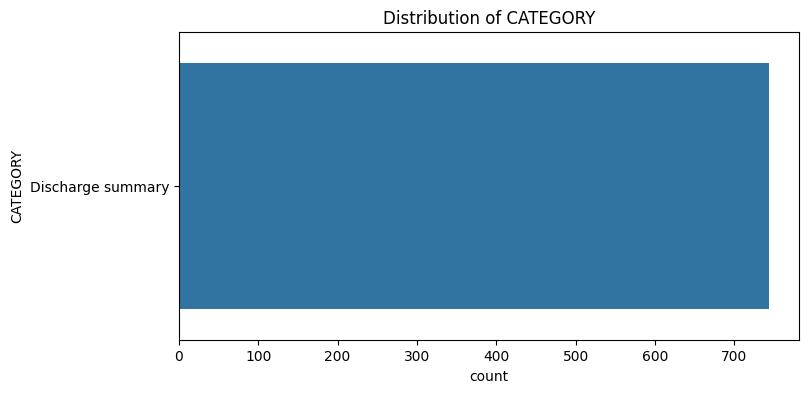

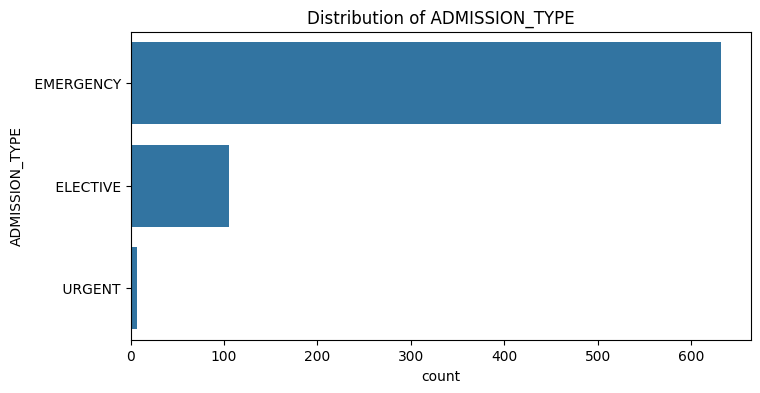

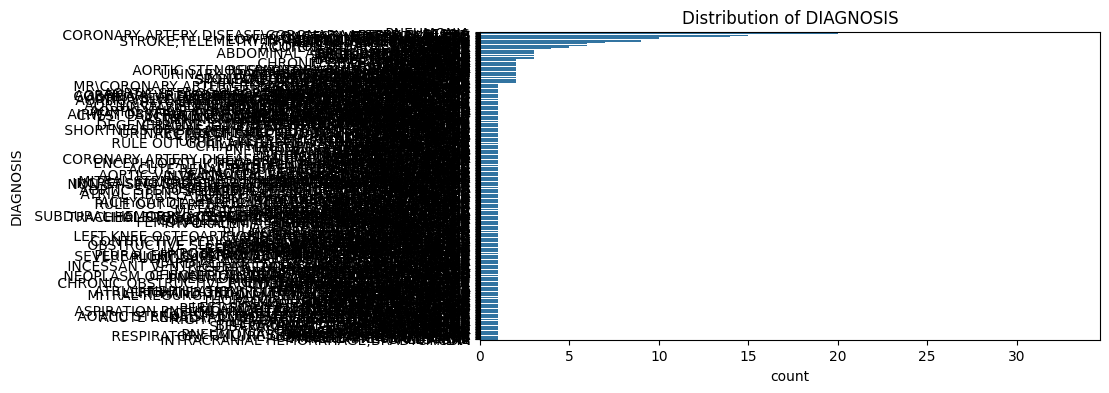

In [37]:

import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

In [38]:

df['text_length'] = df['TEXT'].astype(str).apply(len)
print(df['text_length'].describe())   # Basic length stats

count      744.000000
mean     10805.412634
std       5084.024589
min        701.000000
25%       7156.000000
50%      10220.000000
75%      13518.000000
max      32759.000000
Name: text_length, dtype: float64


In [39]:
print(df['TEXT'].isnull().sum())

0


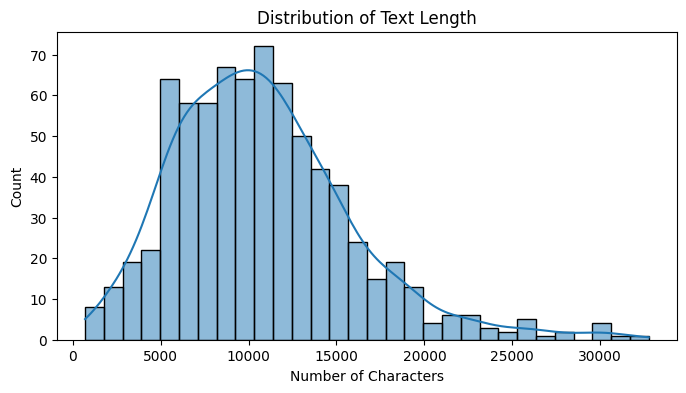

In [40]:

plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Number of Characters")
plt.show()

In [41]:
from collections import Counter
import re

all_text = " ".join(df['TEXT'].dropna().astype(str)) # Define all_text here
words = re.findall(r'\b\w+\b', all_text.lower())
word_freq = Counter(words)
print(word_freq.most_common(20))

[('the', 26698), ('and', 25333), ('to', 21547), ('of', 20455), ('1', 18058), ('was', 17959), ('with', 15184), ('a', 13848), ('2', 13618), ('on', 12387), ('in', 12153), ('for', 10863), ('no', 10146), ('3', 9967), ('mg', 9675), ('5', 9418), ('tablet', 8830), ('4', 8639), ('patient', 7435), ('is', 7254)]


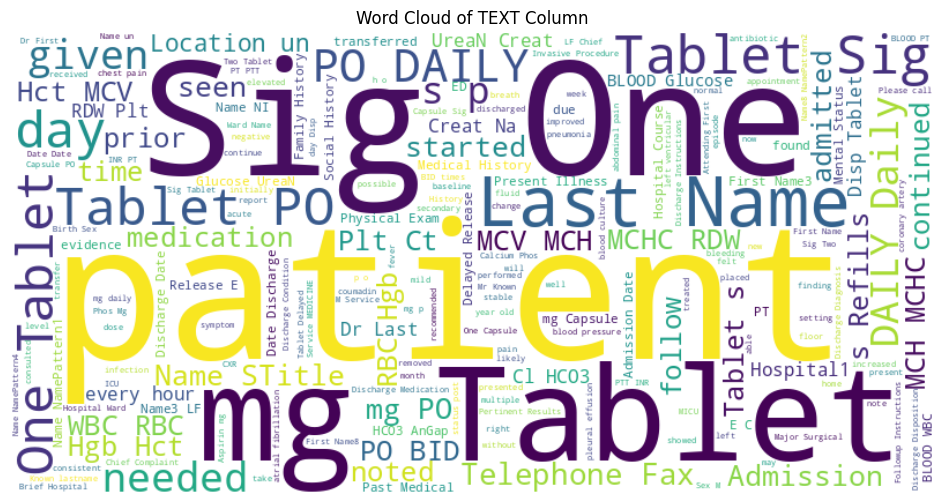

In [42]:

from wordcloud import WordCloud

all_text = " ".join(df['TEXT'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of TEXT Column")
plt.show()

**ICD-10**

In [43]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("sheroleg/icd-10-cm")

print("Path to dataset files:", path)

100%|██████████| 1.33M/1.33M [00:00<00:00, 114MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sheroleg/icd-10-cm/versions/2


In [44]:

import os

print(os.listdir(path))

['icd10cm_order_2025.csv']


In [45]:
import pandas as pd
import os

csv_path = os.path.join(path, "icd10cm_order_2025.csv")  # replace with actual path
icd_df = pd.read_csv(csv_path)
print(icd_df.head())
#print(icd_df.info())

   ID  Code  Code_Type                                  Short_Description  \
0   1   A00          0                                            Cholera   
1   2  A000          1  Cholera due to Vibrio cholerae 01, biovar chol...   
2   3  A001          1    Cholera due to Vibrio cholerae 01, biovar eltor   
3   4  A009          1                               Cholera, unspecified   
4   5   A01          0                     Typhoid and paratyphoid fevers   

                                    Long_Description  
0                                            Cholera  
1  Cholera due to Vibrio cholerae 01, biovar chol...  
2    Cholera due to Vibrio cholerae 01, biovar eltor  
3                               Cholera, unspecified  
4                     Typhoid and paratyphoid fevers  


In [46]:
print(icd_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97584 entries, 0 to 97583
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 97584 non-null  int64 
 1   Code               97584 non-null  object
 2   Code_Type          97584 non-null  int64 
 3   Short_Description  97584 non-null  object
 4   Long_Description   97584 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.7+ MB
None


In [47]:
print(icd_df.describe(include='all'))

                  ID   Code     Code_Type  \
count   97584.000000  97584  97584.000000   
unique           NaN  97584           NaN   
top              NaN   U099           NaN   
freq             NaN      1           NaN   
mean    48792.500000    NaN      0.760985   
std     28170.218671    NaN      0.426484   
min         1.000000    NaN      0.000000   
25%     24396.750000    NaN      1.000000   
50%     48792.500000    NaN      1.000000   
75%     73188.250000    NaN      1.000000   
max     97584.000000    NaN      1.000000   

                                        Short_Description  \
count                                               97584   
unique                                              96790   
top     Inj blood vessels at abdomen, low back and pel...   
freq                                                    3   
mean                                                  NaN   
std                                                   NaN   
min                             

In [48]:

print(icd_df.isnull().sum())              # Count missing values
print(icd_df.isnull().mean() * 100)       # % missing values

ID                   0
Code                 0
Code_Type            0
Short_Description    0
Long_Description     0
dtype: int64
ID                   0.0
Code                 0.0
Code_Type            0.0
Short_Description    0.0
Long_Description     0.0
dtype: float64


In [49]:

print(icd_df['Code_Type'].value_counts())  # Count of each code type
print(icd_df['Code'].nunique())             # Unique ICD‑10 codes

Code_Type
1    74260
0    23324
Name: count, dtype: int64
97584


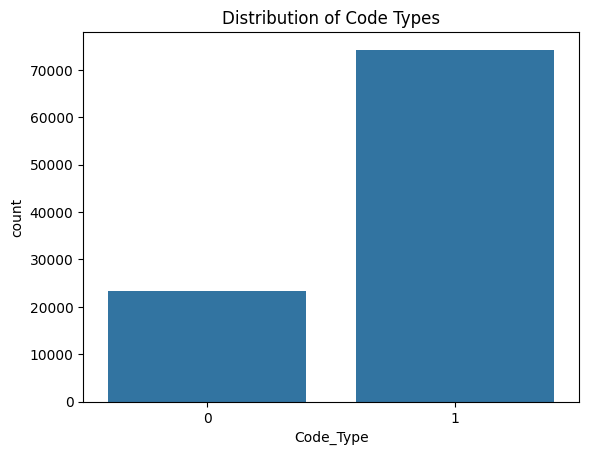

In [50]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Code_Type', data=icd_df)
plt.title("Distribution of Code Types")
plt.show()

In [51]:
print(icd_df['Short_Description'].value_counts().head(20))

Short_Description
Inj blood vessels at abdomen, low back and pelvis level         3
Other specified postprocedural states                           3
Personal history of other specified conditions                  3
Other difficulties with micturition                             3
Assault by other specified means                                3
Oth aplastic anemias and other bone marrow failure syndromes    3
Systemic antibiotics                                            3
Other specified problems related to upbringing                  3
Other long term (current) drug therapy                          3
Oth degeneratv disord of nervous sys in dis classd elswhr       3
Other specified urinary incontinence                            3
Other general symptoms and signs                                3
Oth bacterial agents as the cause of diseases classd elswhr     3
Oth symptoms and signs w cognitive functions and awareness      3
Oth neoplm of uncrt behav of lymphoid, hematpoetc & rel ti

In [52]:

diagnosis = "Cholera"
result = icd_df[icd_df['Short_Description'].str.contains(diagnosis, case=False, na=False)]
print(result[['Code', 'Short_Description', 'Long_Description']])

   Code                                  Short_Description  \
0   A00                                            Cholera   
1  A000  Cholera due to Vibrio cholerae 01, biovar chol...   
2  A001    Cholera due to Vibrio cholerae 01, biovar eltor   
3  A009                               Cholera, unspecified   

                                    Long_Description  
0                                            Cholera  
1  Cholera due to Vibrio cholerae 01, biovar chol...  
2    Cholera due to Vibrio cholerae 01, biovar eltor  
3                               Cholera, unspecified  


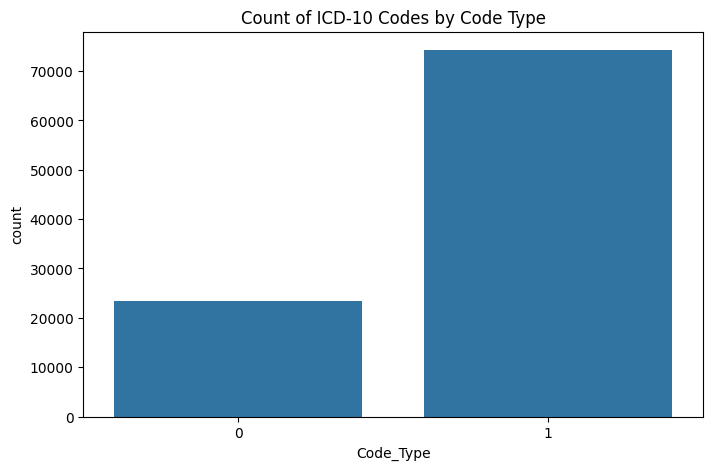

In [53]:

plt.figure(figsize=(8,5))
sns.countplot(x="Code_Type", data=icd_df)
plt.title("Count of ICD‑10 Codes by Code Type")
plt.show()

In [54]:

code = "A000"
description = icd_df.loc[icd_df['Code'] == code, 'Long_Description'].values[0]
print(f"{code}: {description}")

A000: Cholera due to Vibrio cholerae 01, biovar cholerae


In [55]:

import pandas as pd
import os

# Path to CSV
csv_path = os.path.join(path, "icd10cm_order_2025.csv")  # replace with your actual filename

# Load dataset
icd_df = pd.read_csv(csv_path)

# Function to lookup ICD‑10 by ID
def lookup_icd_by_id(id_value):
    row = icd_df.loc[icd_df['ID'] == id_value]
    if not row.empty:
        code = row['Code'].values[0]
        short_desc = row['Short_Description'].values[0]
        long_desc = row['Long_Description'].values[0]
        return f"ID: {id_value}\nCode: {code}\nShort Description: {short_desc}\nLong Description: {long_desc}"
    else:
        return "ID not found"

# Example lookup
print(lookup_icd_by_id(100))

ID: 100
Code: A157
Short Description: Primary respiratory tuberculosis
Long Description: Primary respiratory tuberculosis
